In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels 
#import datetime for dates and time realted calculations
import datetime as dt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
register_matplotlib_converters()
from time import time

In [4]:
daily = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\dataset\input\salesdaily.csv')
weekly = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\dataset\input\salesweekly.csv')
monthly = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\dataset\input\salesmonthly.csv')

In [5]:
def print_shape(data):
    print('Rows : ',data.shape[0])
    print('Columns : ',data.shape[1])

In [6]:
print_shape(daily)
print_shape(weekly)
print_shape(monthly)

Rows :  2106
Columns :  13
Rows :  302
Columns :  9
Rows :  70
Columns :  9


In [7]:
monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [8]:
weekly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,35.102441,27.167611,27.060295,208.627161,61.740853,4.138935,38.439811,20.224561
std,8.617106,7.043491,8.086458,76.069221,22.436970,3.129265,22.900873,11.381464
min,7.670000,6.237000,3.500000,86.250000,18.000000,0.000000,2.000000,1.000000
25%,29.387500,22.387500,21.300000,149.300000,47.000000,2.000000,21.000000,11.475000
50%,34.565000,26.789500,26.500000,198.300000,57.000000,3.979167,35.000000,17.500000
75%,40.175000,31.046500,32.475000,252.471500,71.000000,6.000000,51.000000,26.000000
max,65.330000,53.571000,60.125000,546.899000,154.000000,17.000000,131.000000,65.000000


In [9]:
daily.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [10]:
monthly.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [11]:
daily.sample(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
297,10/26/2014,3.34,1.00,1.6,30.40,6.0,0.0,1.0,1.0,2014,10,276,Sunday
239,8/29/2014,6.34,3.68,5.0,26.28,18.0,1.0,0.0,3.0,2014,8,276,Friday
1155,3/2/2017,5.00,7.13,3.0,13.00,1.0,1.0,1.0,2.0,2017,3,276,Thursday


In [12]:
weekly.sample(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
187,8/6/2017,41.660,17.361000,13.2500,112.912000,41.0000,2.000,13.0,17.0000
41,10/19/2014,23.115,30.610312,28.3375,223.621875,96.0625,4.625,28.0,13.1875
64,3/29/2015,25.010,31.672000,28.9000,232.400000,49.0000,4.000,58.0,17.0000


In [13]:
monthly.sample(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
13,2015-02-28,115.71,123.740,131.830,953.252,243.0,9.0,208.0,47.0
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
25,2016-02-29,173.81,137.528,134.200,1224.862,239.0,20.0,245.0,58.0


In [14]:
monthly['datum'] = pd.to_datetime(monthly['datum'], format= '%Y-%m-%d')
weekly['datum'] = pd.to_datetime(weekly['datum'], format= '%m/%d/%Y')
daily['datum'] = pd.to_datetime(daily['datum'], format= '%m/%d/%Y')

In [15]:
#extracting year from dates
monthly['year'] = monthly['datum'].dt.year
monthly['month'] = monthly['datum'].dt.month
monthly['day'] = monthly['datum'].dt.day

In [16]:
# setting date as index of dataframe, basic condition for anlysing time series data
monthly.set_index(monthly['datum'], inplace= True)

In [17]:
monthly.sample(2)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
datum,,,,,,,,,,,,
2015-03-31,2015-03-31,156.04,129.386,133.8,1084.85,208.0,13.0,195.00,54.0,2015,3,31
2015-01-31,2015-01-31,135.91,130.349,141.0,1044.24,463.0,24.0,177.25,42.0,2015,1,31


In [18]:
monthly.tail(4)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
datum,,,,,,,,,,,,
2019-07-31,2019-07-31,181.00,103.541,92.80,649.80,250.6,20.0,115.0,105.20,2019,7,31
2019-08-31,2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30,2019,8,31
2019-09-30,2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10,2019,9,30
2019-10-31,2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13,2019,10,31


In [19]:
monthly.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'year', 'month', 'day'],
      dtype='object')

In [20]:
num_col_list=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06']

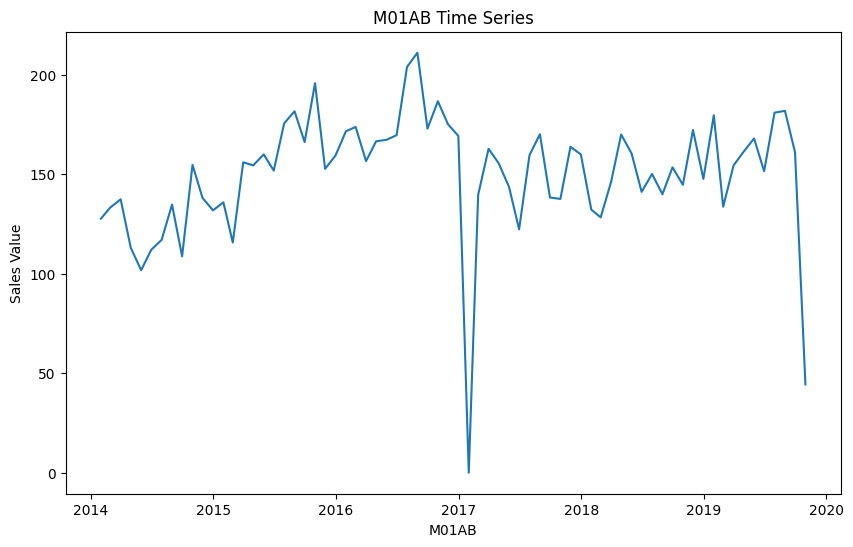

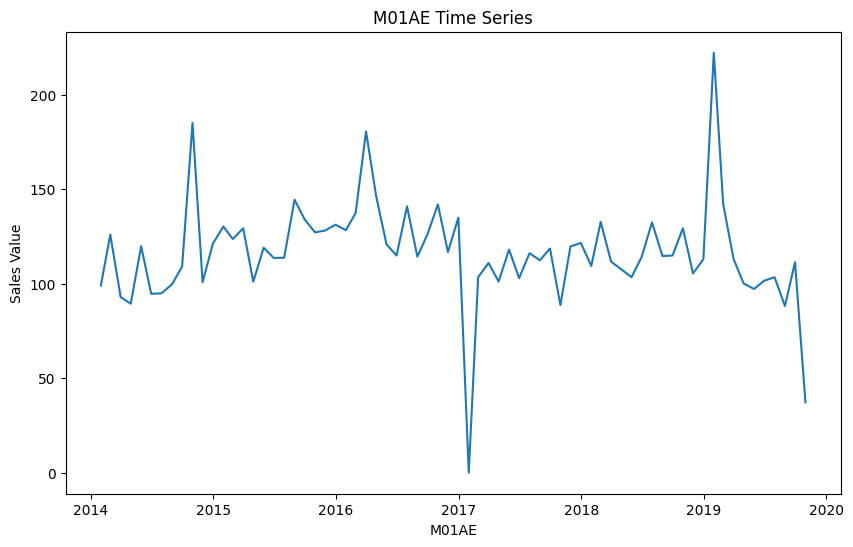

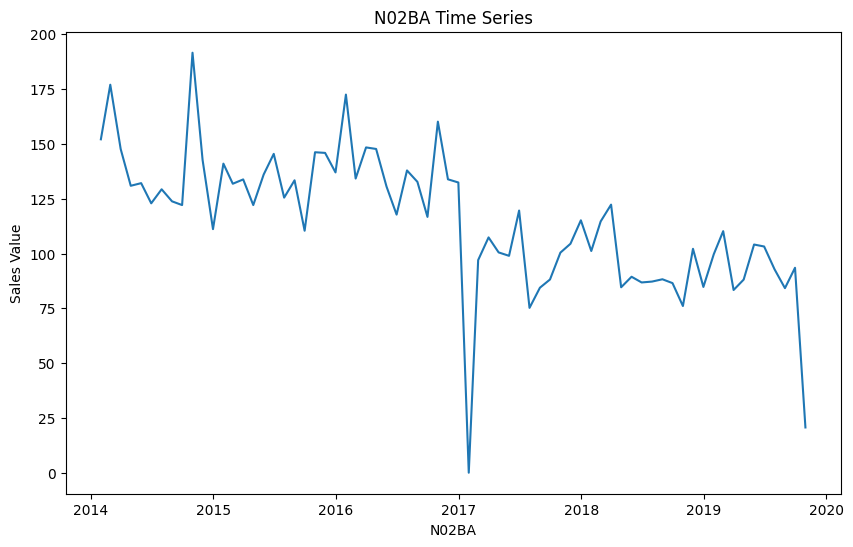

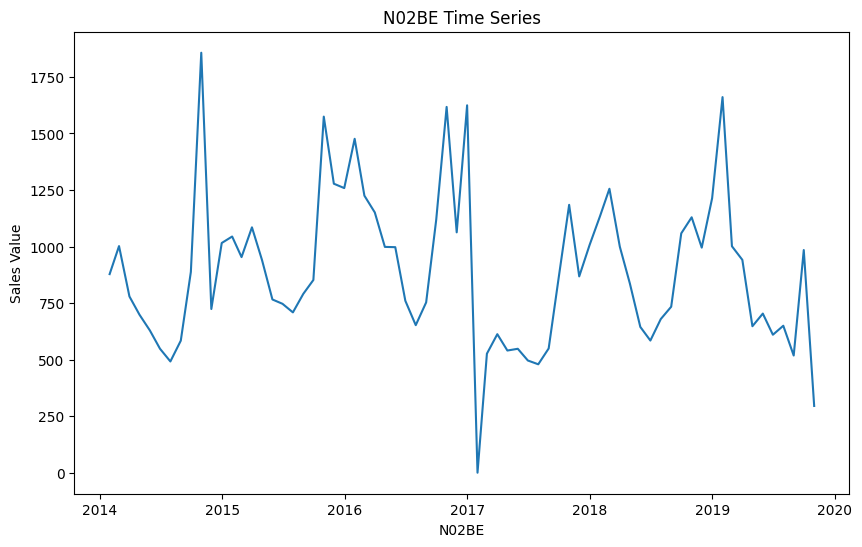

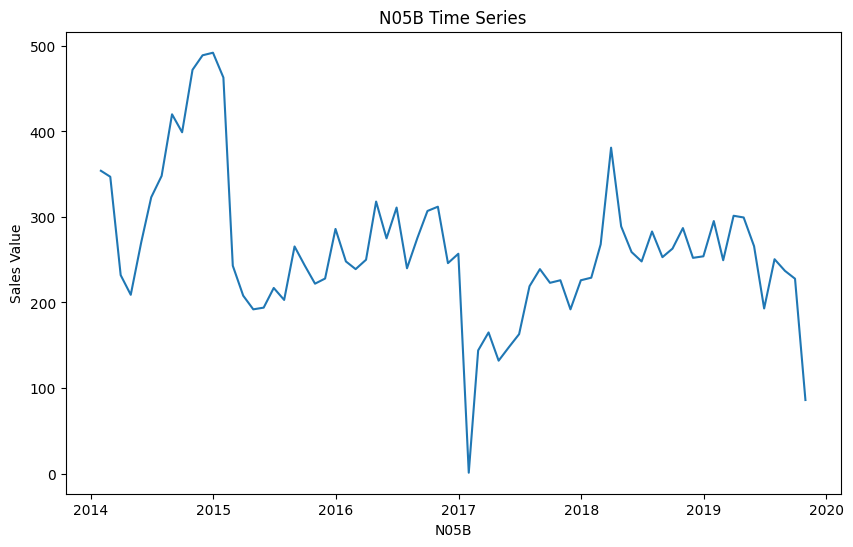

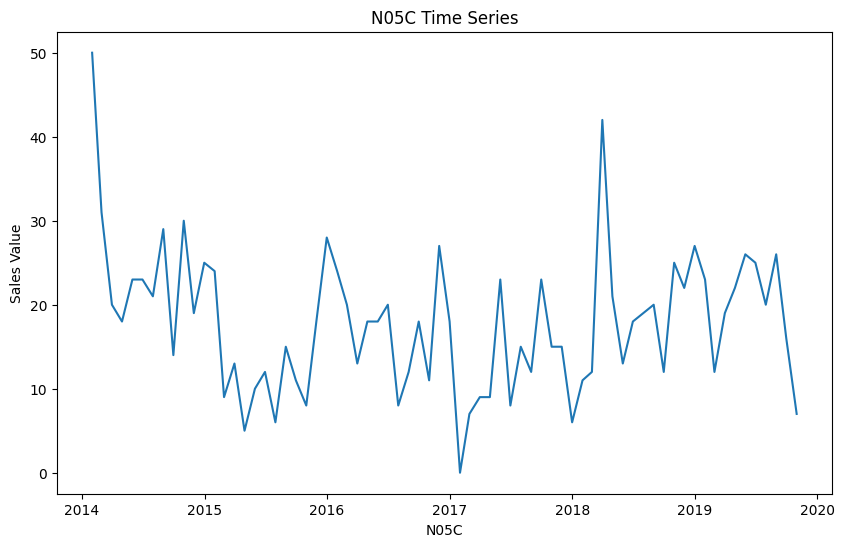

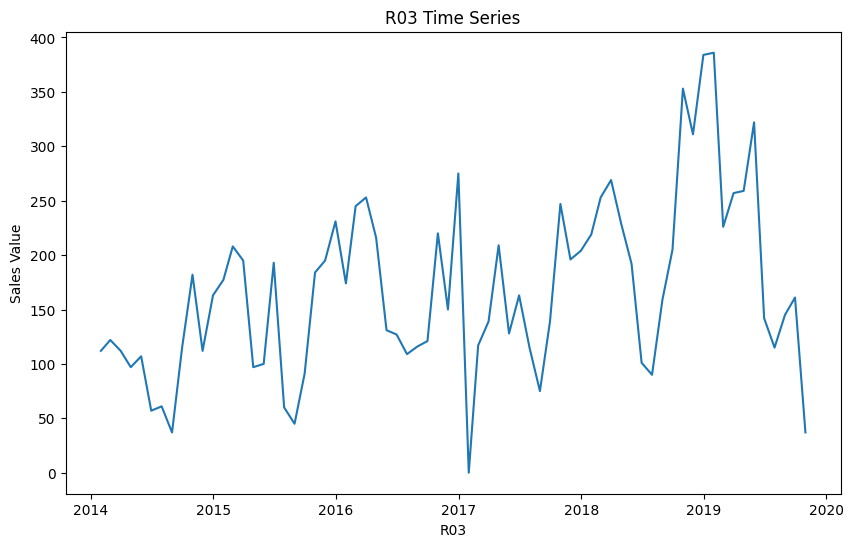

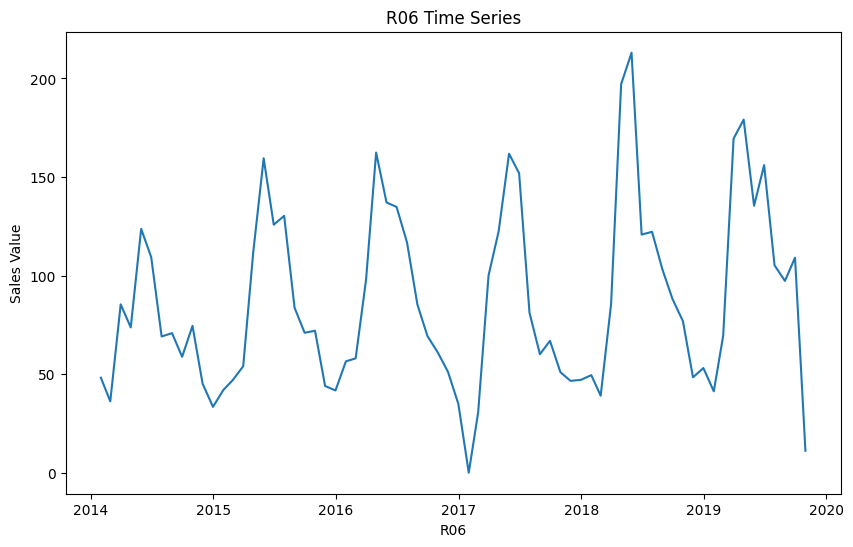

In [21]:
# Plot the time series of each column
for column in num_col_list:
    plt.figure(figsize=(10, 6))
    plt.plot(monthly.index, monthly[column])
    plt.title(f'{column} Time Series')
    plt.xlabel(column)
    plt.ylabel('Sales Value')
    plt.show()


In [22]:
#calculating total sales
monthly['total_sales'] = monthly['M01AB']
for cols in monthly.columns[2:9]:
    monthly['total_sales'] = monthly['total_sales']+monthly[cols]

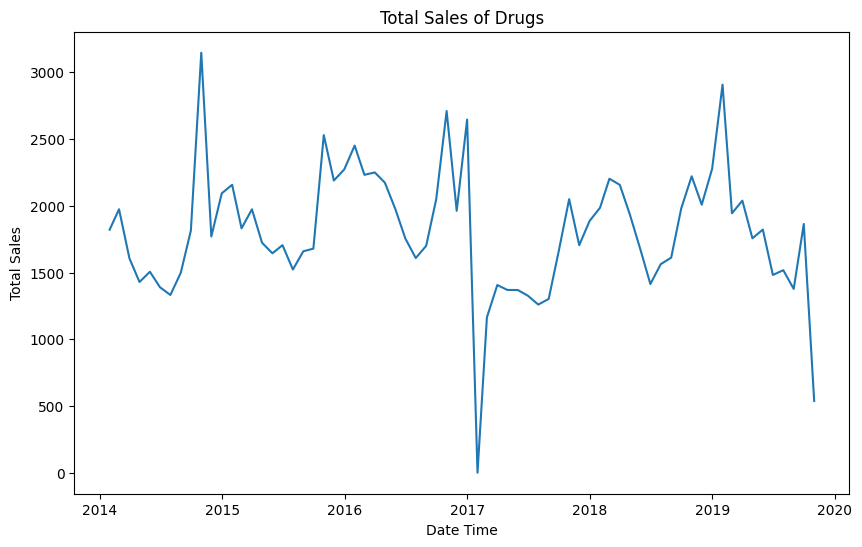

In [23]:
# plotting the total sales data 
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['total_sales'])
plt.xlabel('Date Time')
plt.ylabel('Total Sales')
plt.title('Total Sales of Drugs')
plt.show()

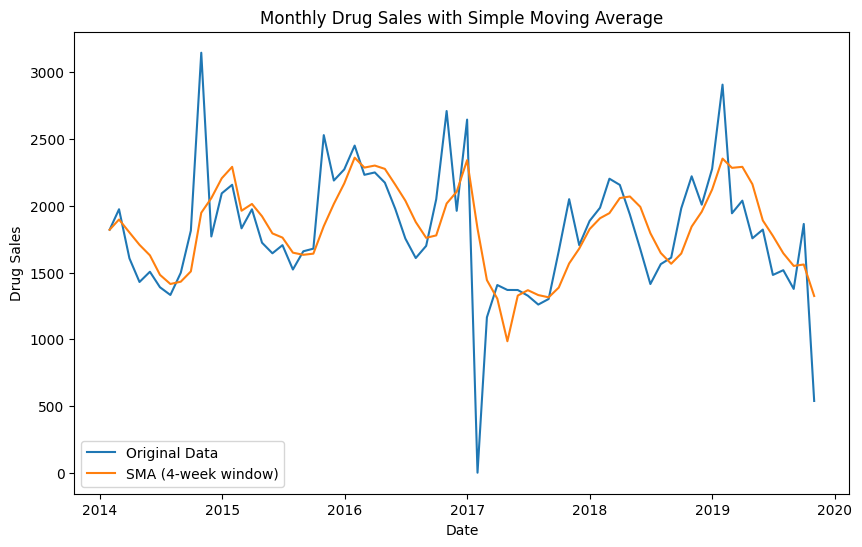

In [24]:
# Calculate a simple moving average with window size 4 (adjust as needed)
window_size = 4
monthly['SMA'] = monthly['total_sales'].rolling(window=window_size, min_periods=1).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['total_sales'], label='Original Data')
plt.plot(monthly.index, monthly['SMA'], label=f'SMA ({window_size}-week window)')
plt.title('Monthly Drug Sales with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Drug Sales')
plt.legend()
plt.show()

In [25]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [26]:
perform_adf_test(monthly["total_sales"])

ADF Statistic: -3.378637
p-value: 0.011709


In [27]:
perform_adf_test(monthly["SMA"])

ADF Statistic: -1.968782
p-value: 0.300427


In [28]:
monthly = monthly.asfreq(pd.infer_freq(monthly.index))

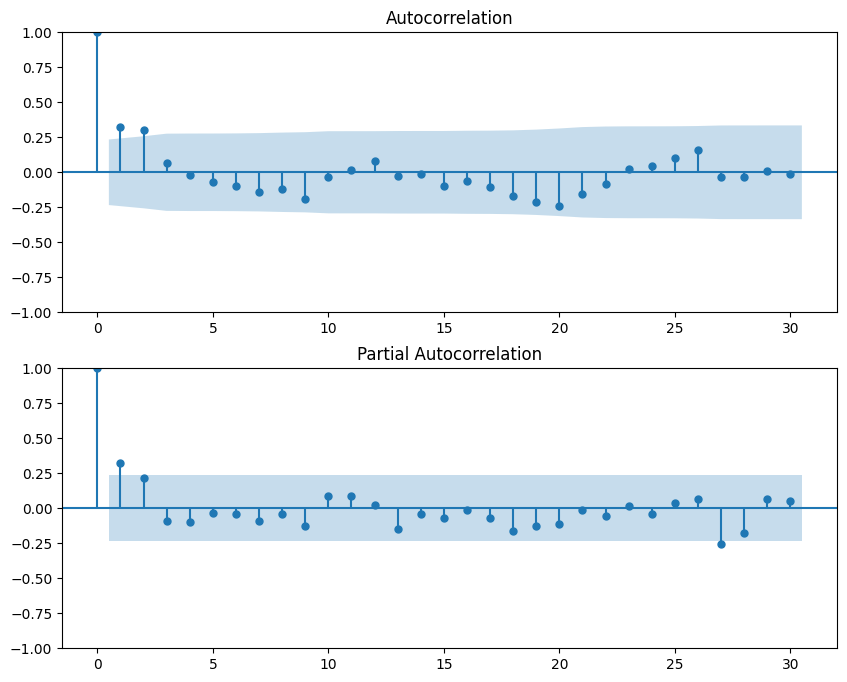

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(monthly['total_sales'], lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(monthly['total_sales'], lags=30, ax=ax2)
plt.show()

In [30]:
#train test split to check the efficiency of our model
train_end = dt.datetime(2019,7,31)
# test_end = datetime(2004,1,1) till end

train_data = monthly[:train_end]
test_data = monthly[train_end + dt.timedelta(days=1):]

In [31]:
# Fit an ARIMA model to the  total sales series
# p, d, q = 1, 0, 1  # You can adjust these values based on ACF and PACF analysis
# model = sm.tsa.ARIMA(train_data["total_sales"], order=(p, d, q))
# results = model.fit()

In [32]:
# You can adjust these values based on ACF and PACF analysis
model = statsmodels.tsa.ar_model.AutoReg(train_data["total_sales"], lags=1)
results = model.fit()

In [33]:
# Print model summary
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:            total_sales   No. Observations:                   67
Model:                     AutoReg(1)   Log Likelihood                -494.001
Method:               Conditional MLE   S.D. of innovations            430.924
Date:                Wed, 09 Apr 2025   AIC                            994.003
Time:                        08:07:10   BIC                           1000.572
Sample:                    02-28-2014   HQIC                           996.599
                         - 07-31-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1170.2422    218.386      5.359      0.000     742.213    1598.272
total_sales.L1     0.3607      0.115      3.129      0.002       0.135       0.587
                                    

In [34]:
#Means AR model'S coefficient is useful but the MA seems to be useless as per its p value
#So our series follow AR(1) model which is:
test_data

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day,total_sales,SMA
datum,,,,,,,,,,,,,,
2019-08-31,2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30,2019,8,31,1377.779,1550.07175
2019-09-30,2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10,2019,9,30,1864.387,1560.62850
2019-10-31,2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13,2019,10,31,538.600,1324.67675


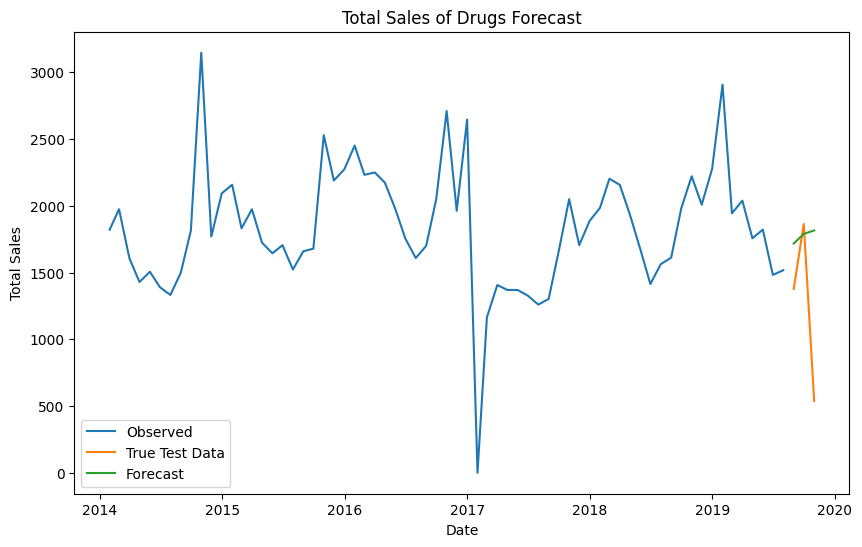

In [35]:
# Forecast the next 10 time steps
forecast = results.forecast(steps=3)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['total_sales'], label='Observed')
plt.plot(test_data.index, test_data['total_sales'], label='True Test Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Total Sales of Drugs Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [36]:
forecast

2019-08-31    1717.759368
2019-09-30    1789.833301
2019-10-31    1815.830170
Freq: ME, dtype: float64

In [37]:
residuals = test_data["total_sales"] - forecast

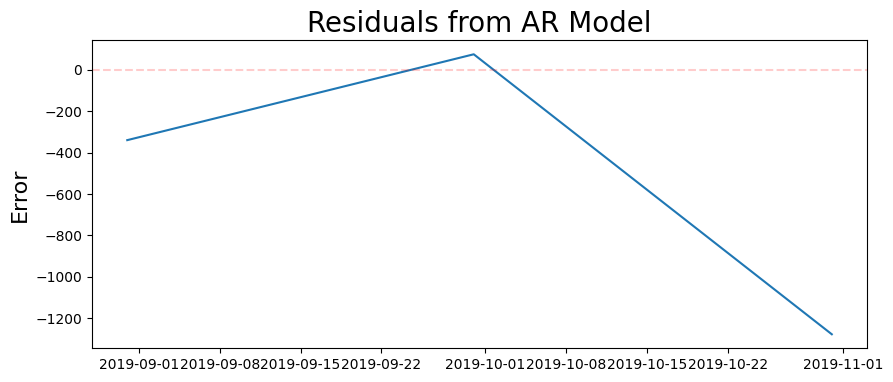

In [38]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [39]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 764.2996381110047


In [ ]:
#Overview-The AR(1) model works fine for predicting just 2 data points but
#root mean square error is high due to last data point

Rows :  2106
Columns :  13
Rows :  302
Columns :  9
Rows :  70
Columns :  9


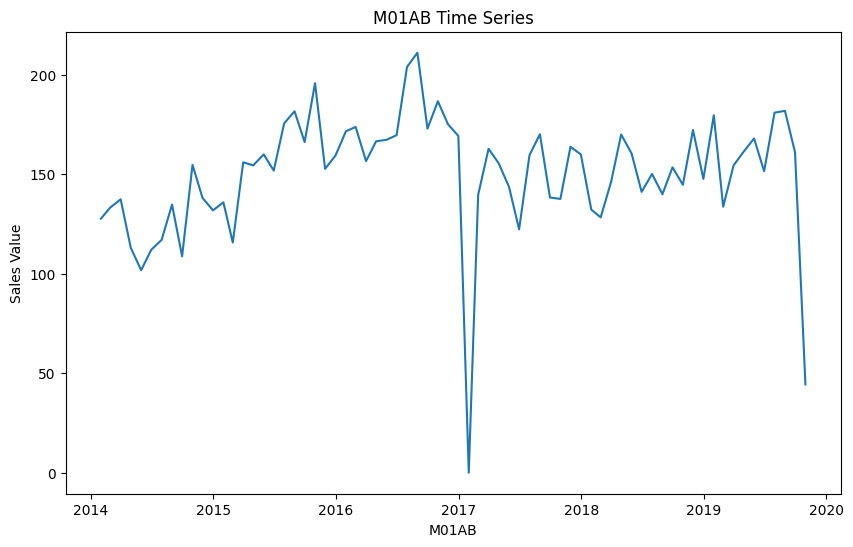

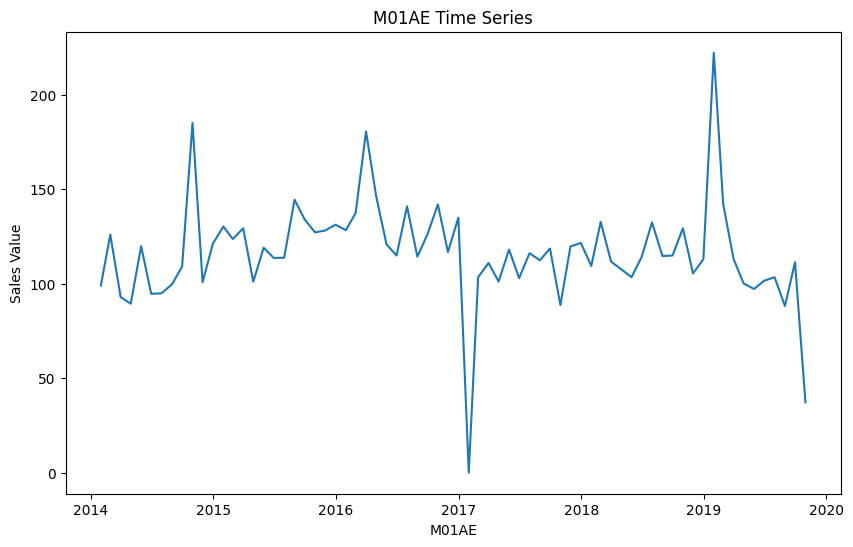

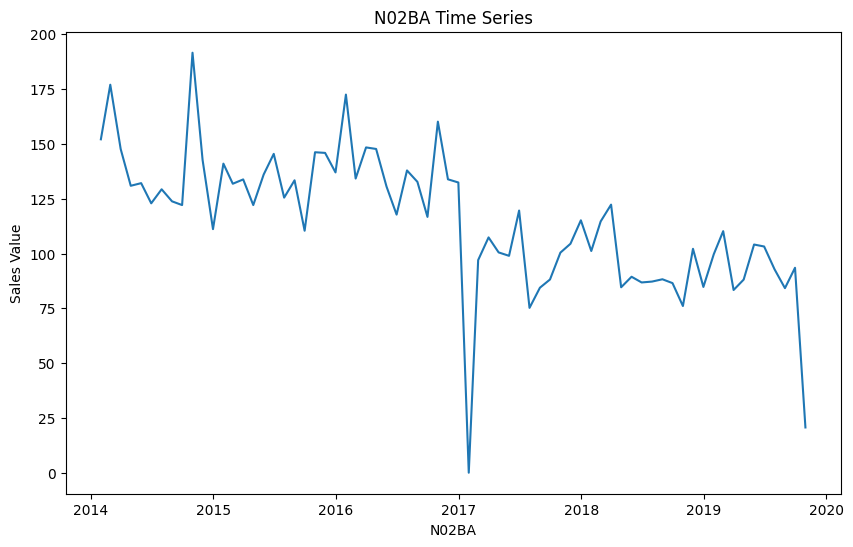

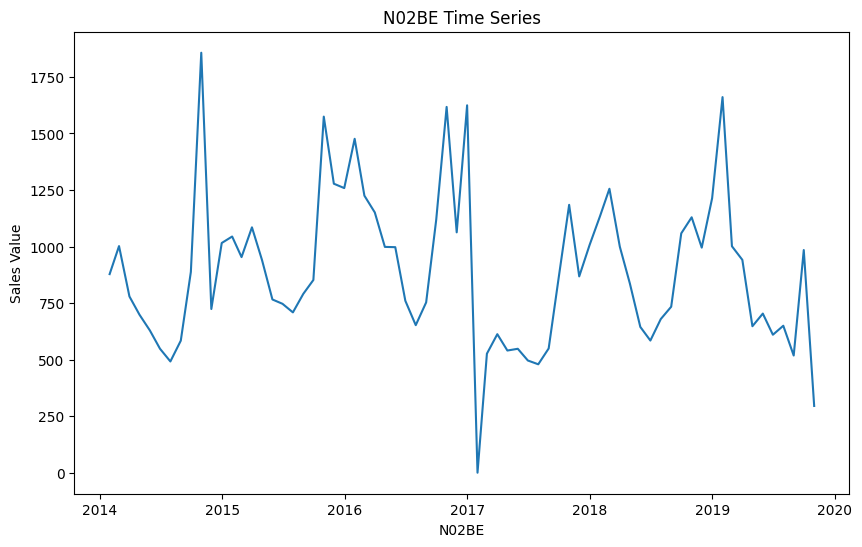

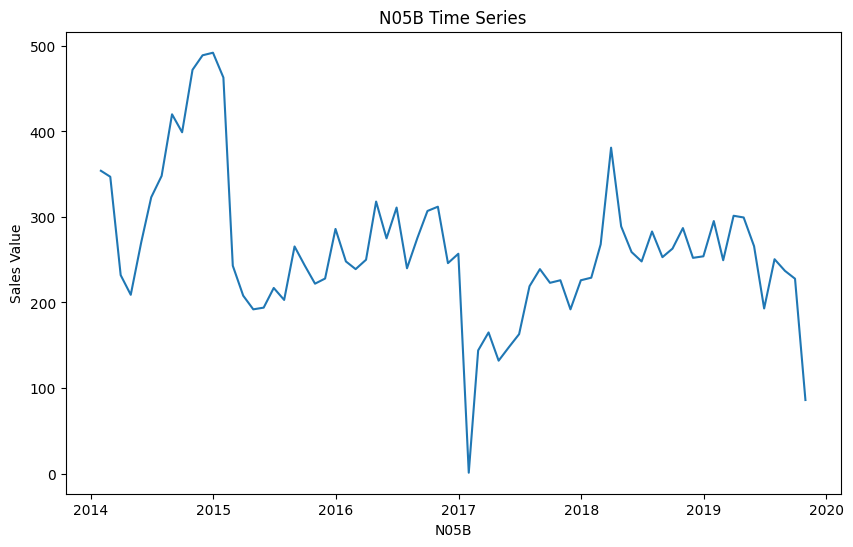

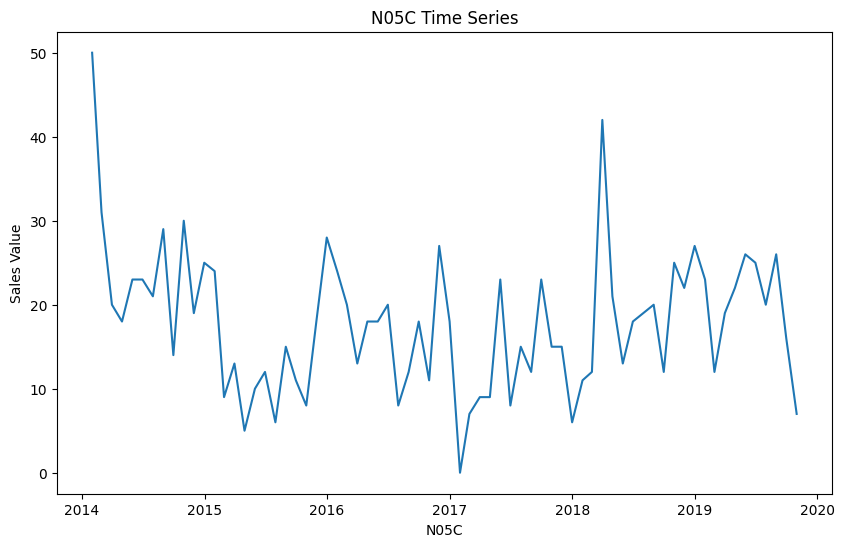

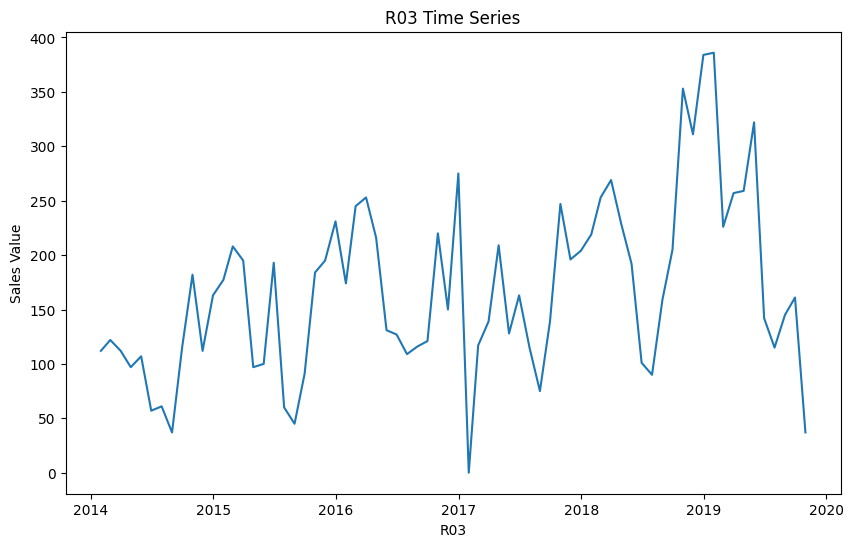

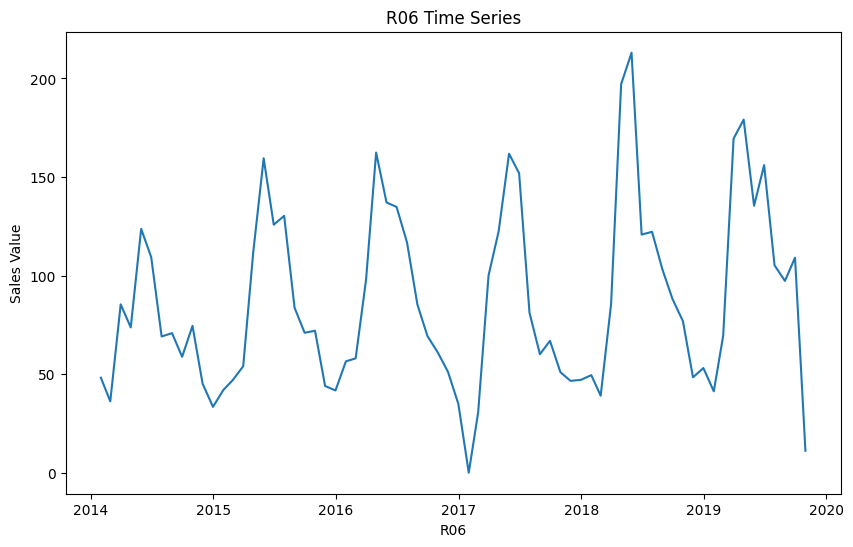

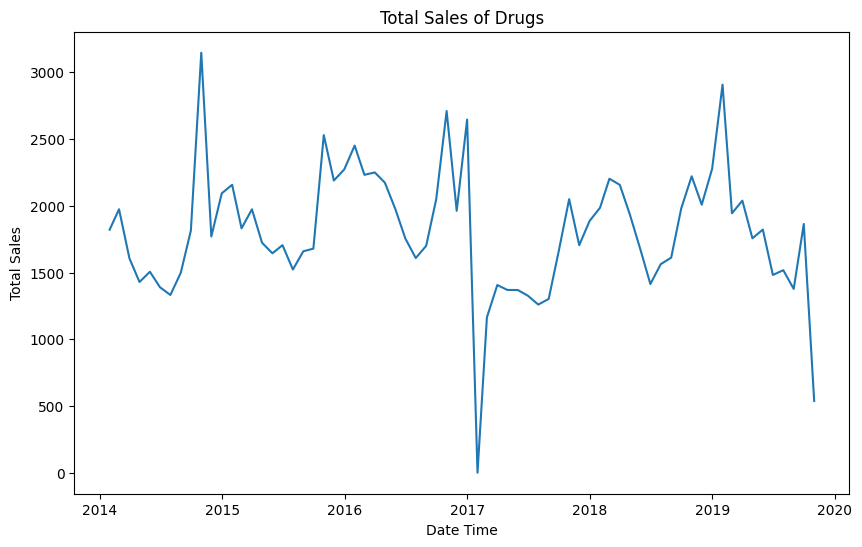

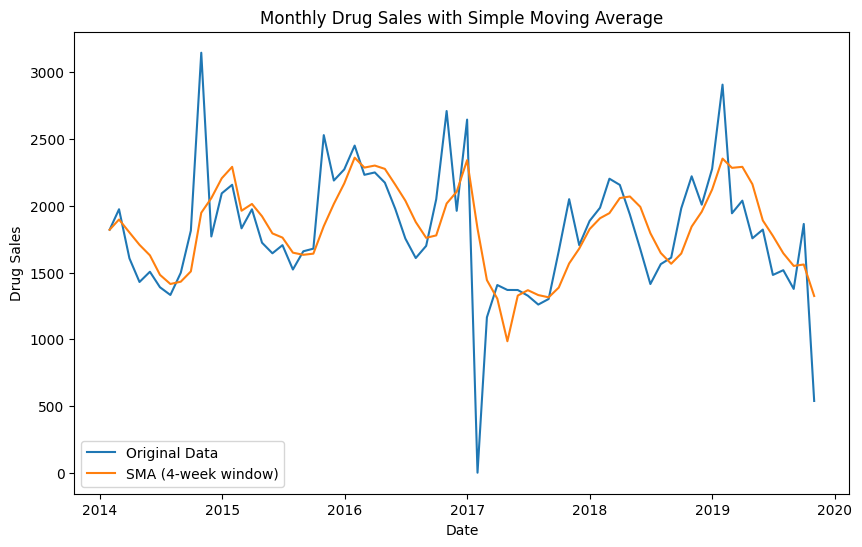

ADF Statistic: -3.378637
p-value: 0.011709
ADF Statistic: -1.968782
p-value: 0.300427


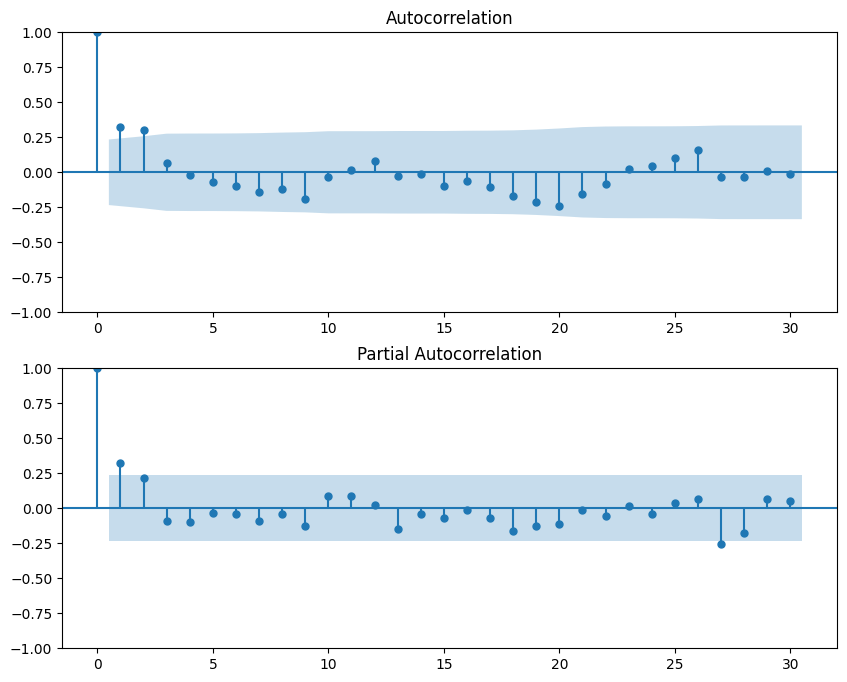

                            AutoReg Model Results                             
Dep. Variable:            total_sales   No. Observations:                   67
Model:                     AutoReg(1)   Log Likelihood                -494.001
Method:               Conditional MLE   S.D. of innovations            430.924
Date:                Wed, 09 Apr 2025   AIC                            994.003
Time:                        08:20:48   BIC                           1000.572
Sample:                    02-28-2014   HQIC                           996.599
                         - 07-31-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1170.2422    218.386      5.359      0.000     742.213    1598.272
total_sales.L1     0.3607      0.115      3.129      0.002       0.135       0.587
                                    

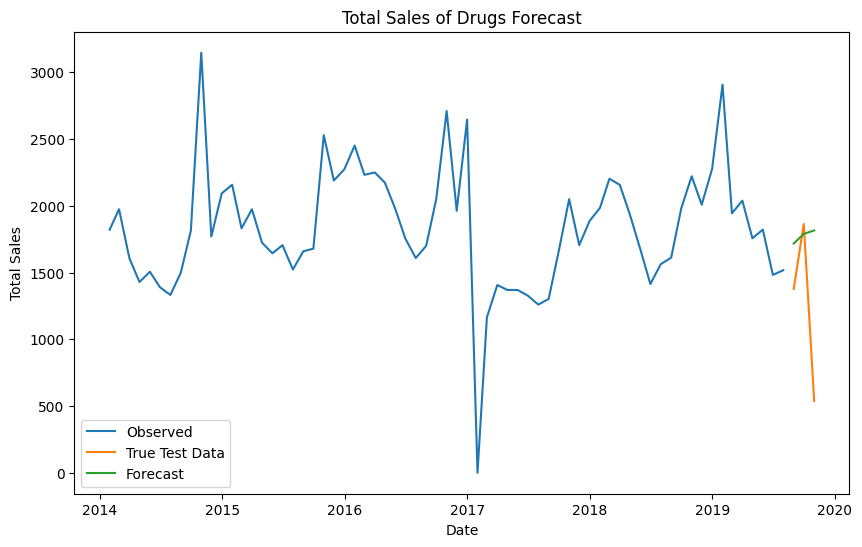

Root Mean Squared Error (RMSE): 764.2996381110047


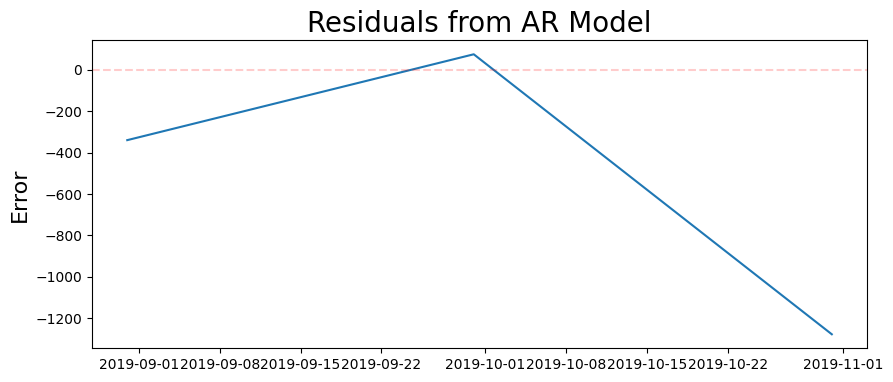

In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
import datetime as dt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Registering Matplotlib converters for proper date handling
register_matplotlib_converters()

# Reading the data
daily = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\dataset\input\salesdaily.csv')
weekly = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\dataset\input\salesweekly.csv')
monthly = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\dataset\input\salesmonthly.csv')

# Function to print the shape of the data
def print_shape(data):
    print('Rows : ', data.shape[0])
    print('Columns : ', data.shape[1])

# Checking the shape of datasets
print_shape(daily)
print_shape(weekly)
print_shape(monthly)

# Converting 'datum' column from object to datetime format
monthly['datum'] = pd.to_datetime(monthly['datum'], format='%Y-%m-%d')
weekly['datum'] = pd.to_datetime(weekly['datum'], format='%m/%d/%Y')
daily['datum'] = pd.to_datetime(daily['datum'], format='%m/%d/%Y')

# Extracting year, month, and day from the 'datum' column
monthly['year'] = monthly['datum'].dt.year
monthly['month'] = monthly['datum'].dt.month
monthly['day'] = monthly['datum'].dt.day

# Setting the 'datum' column as the index
monthly.set_index(monthly['datum'], inplace=True)

# Plotting the time series for different drug categories
num_col_list = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
for column in num_col_list:
    plt.figure(figsize=(10, 6))
    plt.plot(monthly.index, monthly[column])
    plt.title(f'{column} Time Series')
    plt.xlabel(column)
    plt.ylabel('Sales Value')
    plt.show()

# Calculating total sales from different drug categories
monthly['total_sales'] = monthly['M01AB']
for cols in monthly.columns[2:9]:
    monthly['total_sales'] += monthly[cols]

# Plotting the total sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['total_sales'])
plt.xlabel('Date Time')
plt.ylabel('Total Sales')
plt.title('Total Sales of Drugs')
plt.show()

# Calculating a simple moving average (SMA) with a window size of 4
window_size = 4
monthly['SMA'] = monthly['total_sales'].rolling(window=window_size, min_periods=1).mean()

# Plotting the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['total_sales'], label='Original Data')
plt.plot(monthly.index, monthly['SMA'], label=f'SMA ({window_size}-week window)')
plt.title('Monthly Drug Sales with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Drug Sales')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test for stationarity
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

perform_adf_test(monthly["total_sales"])
perform_adf_test(monthly["SMA"])

# Infer the frequency of the data and set it
monthly = monthly.asfreq(pd.infer_freq(monthly.index))

# Plot ACF and PACF for lag analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(monthly['total_sales'], lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(monthly['total_sales'], lags=30, ax=ax2)
plt.show()

# Define train and test dataset
train_end = dt.datetime(2019, 7, 31)
train_data = monthly[:train_end]
test_data = monthly[train_end + dt.timedelta(days=1):]

# AR Model - AutoRegressive model with lag of 1
model = statsmodels.tsa.ar_model.AutoReg(train_data["total_sales"], lags=1)
results = model.fit()

# Print model summary
print(results.summary())

# Forecasting next 3 steps
forecast = results.forecast(steps=3)

# Plotting the forecast results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['total_sales'], label='Observed')
plt.plot(test_data.index, test_data['total_sales'], label='True Test Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Total Sales of Drugs Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Calculating residuals (errors) between forecast and actual data
residuals = test_data["total_sales"] - forecast

# Plotting residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# Calculate and print Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data["total_sales"], forecast))
print("Root Mean Squared Error (RMSE):", rmse)

c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


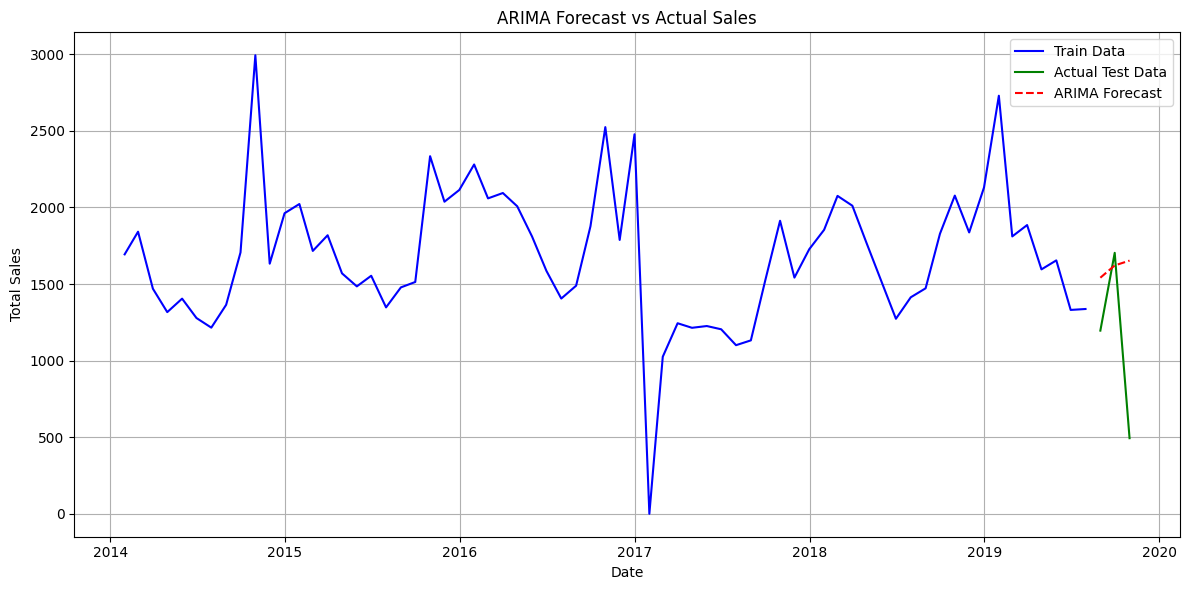

ARIMA - MSE: 43249.03%
ARIMA - RMSE: 61.83%
ARIMA - MAE: 46.73%
         Date  Actual_Sales  Forecasted_Sales
0  2019-08-31      1195.869       1541.025642
1  2019-09-30      1703.317       1621.124162
2  2019-10-31       494.230       1652.560985
3  2019-12-01           NaN       1191.827382
4  2020-01-01           NaN       1465.461907
5  2020-02-01           NaN       1572.795815
6  2020-03-01           NaN       1614.897841
7  2020-04-01           NaN       1631.412478
8  2020-05-01           NaN       1637.890391
9  2020-06-01           NaN       1640.431370
10 2020-07-01           NaN       1641.428076
11 2020-08-01           NaN       1641.819037
12 2020-09-01           NaN       1641.972392
13 2020-10-01           NaN       1642.032547
14 2020-11-01           NaN       1642.056142


c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Register matplotlib converters
register_matplotlib_converters()

# Reading the data
monthly = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\dataset\input\salesmonthly.csv')

# Convert 'datum' column to datetime
monthly['datum'] = pd.to_datetime(monthly['datum'], format='%Y-%m-%d')
monthly.set_index('datum', inplace=True)

# Create year, month, day columns if needed
monthly['year'] = monthly.index.year
monthly['month'] = monthly.index.month
monthly['day'] = monthly.index.day

# Calculate total_sales (update this range if column positions change)
monthly['total_sales'] = monthly.iloc[:, 1:8].sum(axis=1)

# Train-test split
train_end = dt.datetime(2019, 7, 31)
train_data = monthly[:train_end]
test_data = monthly[train_end + dt.timedelta(days=1):]

# Fit ARIMA model
model_arima = ARIMA(train_data['total_sales'], order=(1, 1, 1))  # adjust (p,d,q) as needed
results_arima = model_arima.fit()

# Forecast
forecast_arima = results_arima.forecast(steps=len(test_data))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['total_sales'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['total_sales'], label='Actual Test Data', color='green')
plt.plot(test_data.index, forecast_arima, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation Metrics
mse = mean_squared_error(test_data['total_sales'], forecast_arima)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['total_sales'], forecast_arima)

# Metrics as percentage of mean actual sales
mean_actual = test_data['total_sales'].mean()
print(f"ARIMA - MSE: {mse / mean_actual * 100:.2f}%")
print(f"ARIMA - RMSE: {rmse / mean_actual * 100:.2f}%")
print(f"ARIMA - MAE: {mae / mean_actual * 100:.2f}%")

# Combine forecast and actual
future_months = 12  # You can change this to any number of months

# === Refit the ARIMA model on full available data for better accuracy ===
model_arima_full = ARIMA(monthly["total_sales"], order=(1, 1, 1))  # (p, d, q)
results_arima_full = model_arima_full.fit()

# === Forecast future months ===
forecast_arima_future = results_arima_full.forecast(steps=future_months)

# === Generate corresponding future dates ===
last_date = monthly.index.max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_months, freq='MS')

# === Create DataFrame with future forecast ===
future_forecast_df_arima = pd.DataFrame({
    'Date': future_dates,
    'Actual_Sales': np.nan,
    'Forecasted_Sales': forecast_arima_future
})

# === Forecast test period again using original ARIMA model ===
forecast_arima_test = results_arima.forecast(steps=len(test_data))

forecast_df_arima_test = pd.DataFrame({
    'Date': test_data.index,
    'Actual_Sales': test_data['total_sales'].to_numpy(),
    'Forecasted_Sales': forecast_arima_test.to_numpy()
})

# === Combine test and future forecasts ===
extended_arima_df = pd.concat([forecast_df_arima_test, future_forecast_df_arima], ignore_index=True)

# === Display combined forecast ===
print(extended_arima_df)

# Export to CSV
#forecast_df.to_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\output\arima_forecast_comparison.csv', index=False)


c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


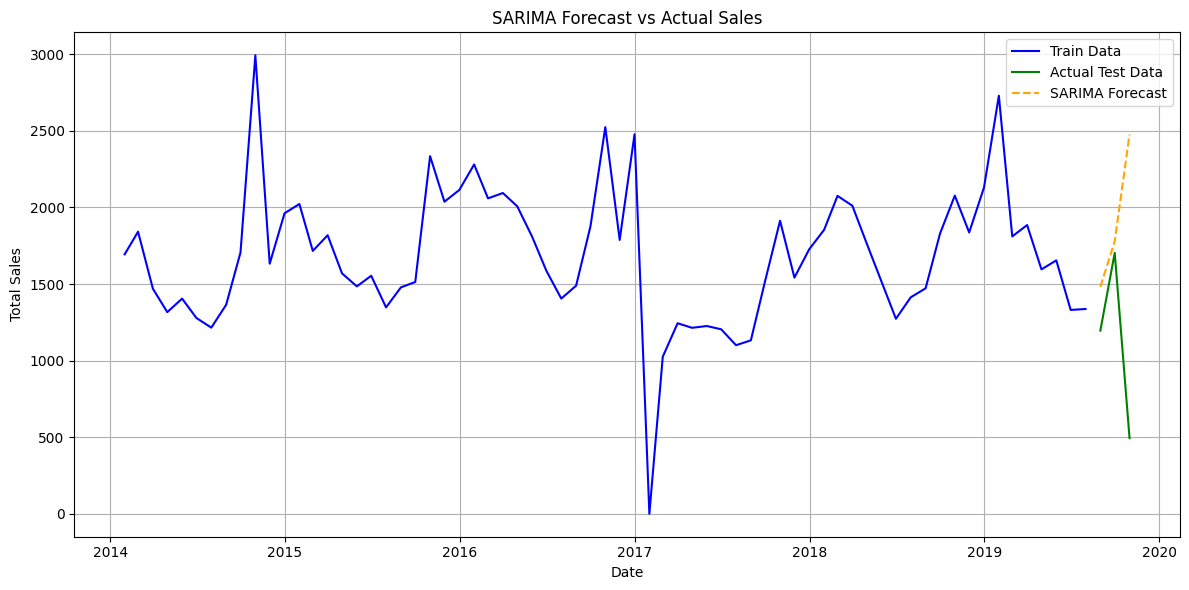

SARIMA - MSE: 118281.53%
SARIMA - RMSE: 102.26%
SARIMA - MAE: 69.04%


c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\saura\OneDrive\Desktop\pharmainventory\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


         Date  Actual_Sales  Forecasted_Sales
0  2019-08-31      1195.869       1481.710228
1  2019-09-30      1703.317       1778.891784
2  2019-10-31       494.230       2475.736386
3  2019-12-01           NaN       1107.704765
4  2020-01-01           NaN       1359.418310
5  2020-02-01           NaN       1193.846652
6  2020-03-01           NaN       1097.613442
7  2020-04-01           NaN       1118.727412
8  2020-05-01           NaN        927.675459
9  2020-06-01           NaN        865.993139
10 2020-07-01           NaN        686.266712
11 2020-08-01           NaN        649.543695
12 2020-09-01           NaN        667.549106
13 2020-10-01           NaN       1038.582112
14 2020-11-01           NaN       1103.625429


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reading the data
monthly = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\dataset\input\salesmonthly.csv')

# Convert 'datum' column to datetime and set as index
monthly['datum'] = pd.to_datetime(monthly['datum'], format='%Y-%m-%d')
monthly.set_index('datum', inplace=True)

# Optional: Add year, month, day columns
monthly['year'] = monthly.index.year
monthly['month'] = monthly.index.month
monthly['day'] = monthly.index.day

# Calculate total_sales
monthly['total_sales'] = monthly.iloc[:, 1:8].sum(axis=1)  # adjust column range as per your data

# Train-test split
train_end = dt.datetime(2019, 7, 31)
train_data = monthly[:train_end]
test_data = monthly[train_end + dt.timedelta(days=1):]

# Fit SARIMA Model
model_sarima = SARIMAX(train_data["total_sales"], 
                       order=(1, 1, 1),           # (p, d, q)
                       seasonal_order=(1, 1, 1, 12))  # (P, D, Q, S)
results_sarima = model_sarima.fit()

# Forecast
forecast_sarima = results_sarima.forecast(steps=len(test_data))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['total_sales'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['total_sales'], label='Actual Test Data', color='green')
plt.plot(test_data.index, forecast_sarima, label='SARIMA Forecast', color='orange', linestyle='--')
plt.title('SARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation Metrics
mse = mean_squared_error(test_data['total_sales'], forecast_sarima)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['total_sales'], forecast_sarima)

# Metrics as percentage of mean actual sales
mean_actual = test_data['total_sales'].mean()
print(f"SARIMA - MSE: {mse / mean_actual * 100:.2f}%")
print(f"SARIMA - RMSE: {rmse / mean_actual * 100:.2f}%")
print(f"SARIMA - MAE: {mae / mean_actual * 100:.2f}%")

# Combine forecast and actual
# === Define how many future steps you want to forecast ===
future_months = 12  # You can change this to any number of months

# === Refit the SARIMA model on full available data for better accuracy ===
model_sarima_full = SARIMAX(monthly["total_sales"], 
                            order=(1, 1, 1), 
                            seasonal_order=(1, 1, 1, 12))
results_sarima_full = model_sarima_full.fit()

# === Forecast future months ===
forecast_sarima_future = results_sarima_full.forecast(steps=future_months)

# === Generate corresponding future dates ===
last_date = monthly.index.max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_months, freq='MS')

# === Create DataFrame with forecast ===
future_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Actual_Sales': np.nan,
    'Forecasted_Sales': forecast_sarima_future
})

# Existing test forecast (keep your previous test period forecast)
forecast_df_sarima_test = pd.DataFrame({
    'Date': test_data.index,
    'Actual_Sales': test_data['total_sales'].to_numpy(),
    'Forecasted_Sales': results_sarima.forecast(steps=len(test_data)).to_numpy()
})

# === Combine test and future forecasts ===
extended_sarima_df = pd.concat([forecast_df_sarima_test, future_forecast_df], ignore_index=True)

# === Display combined forecast ===
print(extended_sarima_df)

# === Optional: Export to CSV ===
# extended_sarima_df.to_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\output\sarima_extended_forecast.csv', index=False)

# Export to CSV
#forecast_df_sarima.to_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\output\sarima_forecast_comparison.csv', index=False)


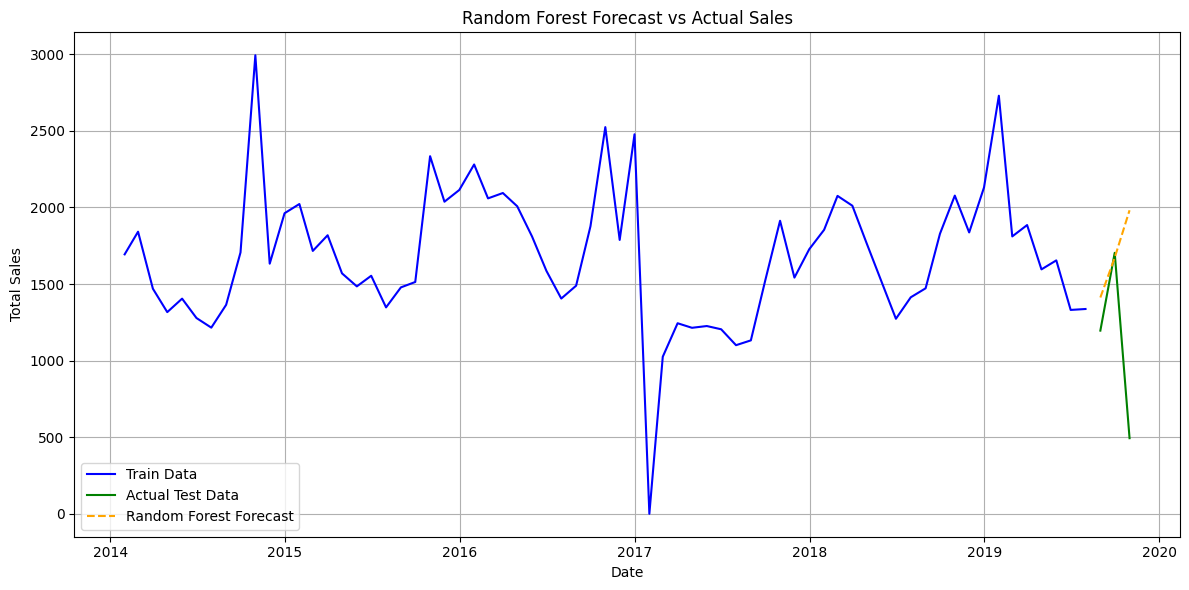

Random Forest - MSE: 66548.06%
Random Forest - RMSE: 76.70%
Random Forest - MAE: 51.11%
         Date  Actual_Sales  Forecasted_Sales
0  2019-08-31      1195.869        1411.93541
1  2019-09-30      1703.317        1671.89273
2  2019-10-31       494.230        1981.03202
3  2019-12-01           NaN        1898.52480
4  2020-01-01           NaN        2171.94590
5  2020-02-01           NaN        1883.64821
6  2020-03-01           NaN        1910.04106
7  2020-04-01           NaN        1584.19532
8  2020-05-01           NaN        1599.09090
9  2020-06-01           NaN        1412.47844
10 2020-07-01           NaN        1369.77403
11 2020-08-01           NaN        1411.93541
12 2020-09-01           NaN        1648.11657
13 2020-10-01           NaN        1981.03202
14 2020-11-01           NaN        1804.39376


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Feature Engineering: Create time-based features for model input
def create_time_features(df):
    df = df.copy()
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    return df

# Prepare train and test data with time features
train_feat = create_time_features(train_data)
test_feat = create_time_features(test_data)

X_train = train_feat[['month', 'quarter', 'year', 'dayofweek']]
y_train = train_feat['total_sales']

X_test = test_feat[['month', 'quarter', 'year', 'dayofweek']]
y_test = test_feat['total_sales']

# Train Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Forecast on test set
forecast_rf = model_rf.predict(X_test)

# Plotting the forecast vs actual sales
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['total_sales'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['total_sales'], label='Actual Test Data', color='green')
plt.plot(test_data.index, forecast_rf, label='Random Forest Forecast', color='orange', linestyle='--')
plt.title('Random Forest Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation Metrics
mse_rf = mean_squared_error(y_test, forecast_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, forecast_rf)

mean_actual = y_test.mean()
print(f"Random Forest - MSE: {mse_rf / mean_actual * 100:.2f}%")
print(f"Random Forest - RMSE: {rmse_rf / mean_actual * 100:.2f}%")
print(f"Random Forest - MAE: {mae_rf / mean_actual * 100:.2f}%")

# Combine forecast and actual sales into one DataFrame
last_date = monthly.index.max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')
future_df = pd.DataFrame(index=future_dates)
future_df = create_time_features(future_df)
X_future = future_df[['month', 'quarter', 'year', 'dayofweek']]
future_forecast = model_rf.predict(X_future)
forecast_df_rf = pd.DataFrame({
    'Date': test_data.index,
    'Actual_Sales': y_test.to_numpy(),
    'Forecasted_Sales': forecast_rf
})

# Future forecast with no actuals
future_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Actual_Sales': np.nan,  # No actual data available yet
    'Forecasted_Sales': future_forecast
})

# Combine
extended_forecast_df = pd.concat([forecast_df_rf, future_forecast_df], ignore_index=True)
print(extended_forecast_df)

# Export to CSV (optional)
# forecast_df_rf.to_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\output\rf_forecast_comparison.csv', index=False)
